In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mall-customerscsv/Mall_Customers.csv


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import  pandas as pd

In [3]:
data = pd .read_csv('/kaggle/input/mall-customerscsv/Mall_Customers.csv')
x= data.iloc[:, [3,4]].values

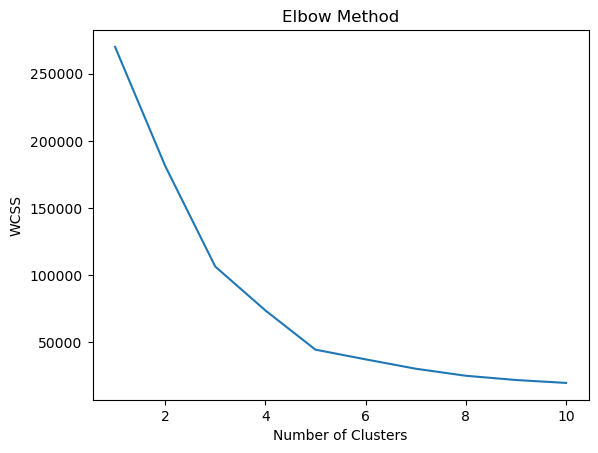

In [4]:
# Elbow method to find optimal no. of clusters
from sklearn.cluster import KMeans
wcss =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [5]:
# Implementing K-Means model on dataset
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(x)

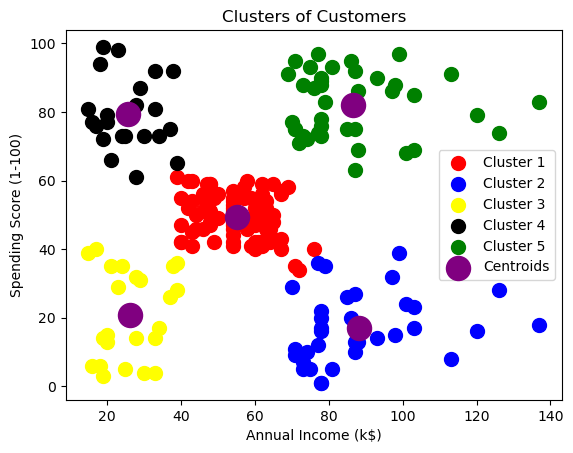

In [6]:
# Visualising clusters
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s=100, c='red', label='Cluster 1')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s=100, c='blue', label='Cluster 2')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s=100, c='yellow', label='Cluster 3')
plt.scatter(x[y_kmeans == 3,0], x[y_kmeans == 3,1], s=100, c='black', label='Cluster 4')
plt.scatter(x[y_kmeans == 4,0], x[y_kmeans == 4,1], s=100, c='green', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='purple', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()